<a href="https://colab.research.google.com/github/Chify16/Chify16/blob/main/credit_risk_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import io
from google.colab import files
uploadd = files.upload()

Saving Credit_Risk_PD_Model_Dataset.xlsx to Credit_Risk_PD_Model_Dataset.xlsx


In [4]:
df_credit_rsk = pd.read_excel(io.BytesIO(uploadd['Credit_Risk_PD_Model_Dataset.xlsx']),sheet_name="Data Set")

In [7]:
# code EDA : Read the data and the industry mapping :
import pandas as pd
import numpy as np
#df_credit_rsk=pd.read_excel("Credit_Risk_PD_Model_Dataset.xlsx",sheet_name="Data Set")

len(df_credit_rsk)
df_credit_rsk.shape

(573, 39)

In [6]:
df_credit_rsk.head()


,Industry,CASH_AND_CASH_EQUIVALENTS_floored1,COST_OF_GOODS_SOLD_1,CURRENT_ASSETS_1,CURRENT_LIABILITIES_1,DEPRECIATION_1,EBITDA_1,FIXED_AND_NON_CURRENT_ASSETS_1,GROSS_PROFIT_1,INTEREST_EXPENSE_1,...,EBITDA_to_Interest_1,EBITDA_to_curr_liab_1,Cash_to_Total_assets_1,Current_Ratio_1,Liquidity_Ratio_1,Curr_to_Total_Assets_1,Gross_Margin_perc_1,Net_Income_Margin_1,Total_Liab_to_Total_Assets_2_1,Default
0,Wholesale,323773,NaN,476381,516192,78247.0,357842,1953656.0,2527734,59291.0,...,6.0353,0.6932,0.1332,0.9229,0.8626,0.1960,NaN,5.9466,-0.0501,0
1,EduArtsHealthSocial,18593,11753.0,21913,257405,6988.0,42274,668688.0,124057,6456.0,...,6.5479,0.1642,0.0269,0.0851,NaN,0.0317,91.3457,21.2275,-0.0472,0
2,Retail,202720,3420276.0,665190,373352,76899.0,406223,542187.0,1577802,11742.0,...,34.5947,1.0880,0.1679,1.7817,0.7335,0.5509,31.5682,5.4611,-0.3119,1
3,Agriculture - Other,87515,7905311.0,1820195,2153519,702651.0,675750,7409750.0,3242324,88218.0,...,7.6600,0.3138,0.0095,0.8452,0.2709,0.1972,29.0853,-1.0327,-0.0209,0
4,EduArtsHealthSocial,272938,237933.0,381958,681622,NaN,-515748,7395426.0,540762,179654.0,...,-2.8708,-0.7566,0.0351,0.5604,0.5241,0.0491,69.4446,-89.3035,-0.0241,0


In [12]:
# percentage of 0s and 1s we have in our data set?
df_credit_rsk['Default'].value_counts() * 100 / len(df_credit_rsk)



,count
Default,
0,89.179756
1,10.820244


In [13]:
pd.set_option('display.float_format', '{:.2f}'.format)
# :.2f specifies that the value should be formatted as a float with 2 decimal places.


df_credit_rsk.describe()

,CASH_AND_CASH_EQUIVALENTS_floored1,COST_OF_GOODS_SOLD_1,CURRENT_ASSETS_1,CURRENT_LIABILITIES_1,DEPRECIATION_1,EBITDA_1,FIXED_AND_NON_CURRENT_ASSETS_1,GROSS_PROFIT_1,INTEREST_EXPENSE_1,LONG_TERM_DEBT_1,...,EBITDA_to_Interest_1,EBITDA_to_curr_liab_1,Cash_to_Total_assets_1,Current_Ratio_1,Liquidity_Ratio_1,Curr_to_Total_Assets_1,Gross_Margin_perc_1,Net_Income_Margin_1,Total_Liab_to_Total_Assets_2_1,Default
count,573.00,518.00,573.00,573.00,534.00,573.00,561.00,573.00,480.00,359.00,...,480.00,573.00,573.00,573.00,475.00,573.00,518.00,573.00,562.00,573.00
mean,260737.46,2418543.23,1882030.52,1519872.27,95440.10,354311.38,1912062.54,1338839.80,37752.22,787594.16,...,164.78,0.65,0.10,1.70,0.90,0.48,44.00,8.28,-0.07,0.11
std,821575.23,2862968.44,3882481.65,3559609.22,155056.64,852420.85,3196332.90,1624553.55,59755.10,1394348.44,...,774.92,1.13,0.15,1.97,1.04,0.34,22.92,24.89,0.21,0.31
min,-644364.00,5116.00,1936.00,228.00,271.00,-7324453.00,792.00,-313885.00,1.00,1637.00,...,-211.97,-1.73,0.00,0.02,0.01,0.00,1.81,-193.00,-0.75,0.00
25%,790.00,315268.00,236199.00,253171.00,14941.00,73034.00,271800.00,336650.00,8421.00,116534.00,...,3.60,0.12,0.00,0.66,0.16,0.15,25.50,1.51,-0.13,0.00
50%,49605.00,1024016.00,770200.00,706407.00,45219.00,189612.00,782718.00,718388.00,17734.00,323565.00,...,9.21,0.31,0.03,1.17,0.67,0.39,37.90,5.68,-0.05,0.00
75%,284872.00,4245791.75,2180921.00,1656906.00,111614.25,489874.00,2324411.00,1749496.00,37838.00,756978.00,...,34.89,0.80,0.13,1.89,1.14,0.83,57.77,16.78,0.01,0.00
max,4052236.00,12212492.00,34522271.00,32716574.00,1334359.00,7660463.00,24511837.00,12018269.00,403764.00,9090077.00,...,6086.44,8.46,0.71,14.25,6.90,1.00,97.95,108.77,1.94,1.00


In [16]:
# missing values investigation
# cal the percentage of missing values for each column in the dataframe
percent_missing = df_credit_rsk.isnull().sum() * 100 / len(df_credit_rsk)

# Create a new DataFrame to store column names, percentage of missing values, and their buckets.
missing_value_df = pd.DataFrame({
    'column_name': df_credit_rsk.columns,  # Column names in the DataFrame
    'percent_missing': percent_missing    # Percentage of missing values for each column
})

# Add a new column categorizing the missing percentages into buckets.
missing_value_df['missing_bucket'] = pd.cut(
    missing_value_df['percent_missing'],
    bins=[0, 2, 20, 100],  # Bucket ranges: <2%, 2%-20%, >20%
    labels=['<2%', '2%-20%', '>20%']      # Labels for the buckets
)

# Sort the DataFrame by the percentage of missing values in descending order.
missing_value_df.sort_values('percent_missing', ascending=False, inplace=True)

# Display the updated DataFrame.
missing_value_df




,column_name,percent_missing,missing_bucket
Long_Term_Debt_to_Equity_1,Long_Term_Debt_to_Equity_1,37.35,>20%
LONG_TERM_DEBT_1,LONG_TERM_DEBT_1,37.35,>20%
NON_CURRENT_LIABILITIES_1,NON_CURRENT_LIABILITIES_1,21.64,>20%
Liquidity_Ratio_1,Liquidity_Ratio_1,17.10,2%-20%
NET_TRADE_RECV_1,NET_TRADE_RECV_1,17.10,2%-20%
INTEREST_EXPENSE_1,INTEREST_EXPENSE_1,16.23,2%-20%
EBITDA_to_Interest_1,EBITDA_to_Interest_1,16.23,2%-20%
TOTAL_INVENTORY_1,TOTAL_INVENTORY_1,16.06,2%-20%
NetFixedAssets_to_TotalDebt_1,NetFixedAssets_to_TotalDebt_1,10.12,2%-20%
Gross_Margin_perc_1,Gross_Margin_perc_1,9.60,2%-20%


In [18]:
# Track dropped rows and columns
initial_row_count = len(df_credit_rsk)
dropped_columns = []
dropped_rows = 0

# Iterate through each bucket and handle columns accordingly.
for index, row in missing_value_df.iterrows():
    col = row['column_name']
    missing_percentage = row['percent_missing']
    bucket = row['missing_bucket']

    if bucket == '<2%':
        # Drop rows where the column has missing values.
        rows_before_drop = len(df_credit_rsk)
        df_credit_rsk = df_credit_rsk[df_credit_rsk[col].notnull()]
        rows_after_drop = len(df_credit_rsk)
        dropped_rows += rows_before_drop - rows_after_drop
    elif bucket == '2%-20%':
        # Replace missing values: use median for numeric columns and mode for categorical columns.
        if df_credit_rsk[col].dtype in ['int64', 'float64']:
            median_value = df_credit_rsk[col].median()
            df_credit_rsk[col].fillna(median_value, inplace=True)
        else:
            mode_value = df_credit_rsk[col].mode()[0]
            df_credit_rsk[col].fillna(mode_value, inplace=True)
    elif bucket == '>20%':
        # Drop the column entirely.
        df_credit_rsk.drop(columns=[col], inplace=True)
        dropped_columns.append(col)


<ipython-input-18-6be65c2ce714>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_credit_rsk[col].fillna(median_value, inplace=True)


In [19]:
# Calculate percentage of rows dropped.
dropped_percentage = (dropped_rows / initial_row_count) * 100

# Display the updated DataFrame and summary.
print(f"Percentage of rows dropped: {dropped_percentage:.2f}%")
print(f"Columns dropped: {dropped_columns}")

Percentage of rows dropped: 1.92%
Columns dropped: ['Long_Term_Debt_to_Equity_1', 'LONG_TERM_DEBT_1', 'NON_CURRENT_LIABILITIES_1']


In [20]:
# if the percentage row drop is more than 5% do imputation instead.
#outlier definition: Mu +3sigma, 1.5*interquartile range
# Mu+/-3sigma -> 99.7%

In [21]:
df_credit_rsk.head(2)

,Industry,CASH_AND_CASH_EQUIVALENTS_floored1,COST_OF_GOODS_SOLD_1,CURRENT_ASSETS_1,CURRENT_LIABILITIES_1,DEPRECIATION_1,EBITDA_1,FIXED_AND_NON_CURRENT_ASSETS_1,GROSS_PROFIT_1,INTEREST_EXPENSE_1,...,EBITDA_to_Interest_1,EBITDA_to_curr_liab_1,Cash_to_Total_assets_1,Current_Ratio_1,Liquidity_Ratio_1,Curr_to_Total_Assets_1,Gross_Margin_perc_1,Net_Income_Margin_1,Total_Liab_to_Total_Assets_2_1,Default
0,Wholesale,323773,1024016.00,476381,516192,78247.00,357842,1953656.00,2527734,59291.00,...,6.04,0.69,0.13,0.92,0.86,0.20,37.90,5.95,-0.05,0
1,EduArtsHealthSocial,18593,11753.00,21913,257405,6988.00,42274,668688.00,124057,6456.00,...,6.55,0.16,0.03,0.09,0.67,0.03,91.35,21.23,-0.05,0


In [23]:
#handling outliers
# Identify only the numeric columns in the DataFrame
numeric_cols = df_credit_rsk.select_dtypes(include=['number']).columns

# Calculate the 2nd and 98th percentiles for each numeric column
lower_bound = df_credit_rsk[numeric_cols].quantile(0.02)  # 2nd percentile (floor)
upper_bound = df_credit_rsk[numeric_cols].quantile(0.98)  # 98th percentile (cap)

# Ensure alignment of bounds with the DataFrame
lower_bound = lower_bound[numeric_cols]
upper_bound = upper_bound[numeric_cols]

# Create a copy of the DataFrame
df_credit_rsk_clipped = df_credit_rsk.copy()

# Clip values only for numeric columns
for col in numeric_cols:
    df_credit_rsk_clipped[col] = df_credit_rsk_clipped[col].clip(lower=lower_bound[col], upper=upper_bound[col])

# Display the updated DataFrame
df_credit_rsk_clipped.head()

,Industry,CASH_AND_CASH_EQUIVALENTS_floored1,COST_OF_GOODS_SOLD_1,CURRENT_ASSETS_1,CURRENT_LIABILITIES_1,DEPRECIATION_1,EBITDA_1,FIXED_AND_NON_CURRENT_ASSETS_1,GROSS_PROFIT_1,INTEREST_EXPENSE_1,...,EBITDA_to_Interest_1,EBITDA_to_curr_liab_1,Cash_to_Total_assets_1,Current_Ratio_1,Liquidity_Ratio_1,Curr_to_Total_Assets_1,Gross_Margin_perc_1,Net_Income_Margin_1,Total_Liab_to_Total_Assets_2_1,Default
0,Wholesale,323773,1024016.00,476381.00,516192.00,78247.00,357842,1953656.00,2527734.00,59291.00,...,6.04,0.69,0.13,0.92,0.86,0.20,37.90,5.95,-0.05,0
1,EduArtsHealthSocial,18593,22529.00,21913.00,257405.00,6988.00,42274,668688.00,124057.00,6456.00,...,6.55,0.16,0.03,0.10,0.67,0.03,91.35,21.23,-0.05,0
2,Retail,202720,3420276.00,665190.00,373352.00,76899.00,406223,542187.00,1577802.00,11742.00,...,34.59,1.09,0.17,1.78,0.73,0.55,31.57,5.46,-0.31,1
3,Agriculture - Other,87515,7905311.00,1820195.00,2153519.00,509024.00,675750,7409750.00,3242324.00,88218.00,...,7.66,0.31,0.01,0.85,0.27,0.20,29.09,-1.03,-0.02,0
4,EduArtsHealthSocial,272938,237933.00,381958.00,681622.00,45219.00,-515748,7395426.00,540762.00,179654.00,...,-2.87,-0.76,0.04,0.56,0.52,0.05,69.44,-48.28,-0.02,0


In [24]:
# Display the data type of each column in the DataFrame
print(df_credit_rsk_clipped.dtypes)

Industry                               object
CASH_AND_CASH_EQUIVALENTS_floored1      int64
COST_OF_GOODS_SOLD_1                  float64
CURRENT_ASSETS_1                      float64
CURRENT_LIABILITIES_1                 float64
DEPRECIATION_1                        float64
EBITDA_1                                int64
FIXED_AND_NON_CURRENT_ASSETS_1        float64
GROSS_PROFIT_1                        float64
INTEREST_EXPENSE_1                    float64
NET_FIXED_ASSETS_1                    float64
NET_INCOME_1                          float64
NET_INTANGIBLES_1                       int64
NET_TRADE_RECV_1                      float64
RETAINED_EARNINGS_1                   float64
TOTAL_ASSETS_1                        float64
TOTAL_DEBT_1                          float64
TOTAL_INVENTORY_1                     float64
TURNOVER_1                            float64
WORKING_CAPITAL_1                     float64
Debt_to_TNW_1                         float64
Equity_to_Liability_1             

In [25]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data, target, threshold=4):
    """
    Calculate VIF and remove features iteratively above the given threshold.

    Parameters:
    - data: DataFrame containing all variables (including target)
    - target: Name of the target variable
    - threshold: VIF threshold for feature removal

    Returns:
    - DataFrame with reduced features based on VIF
    - DataFrame showing VIF values of the final set of features
    - List of dropped features
    - Counts of variables before and after VIF reduction
    """
    # Exclude target variable from independent variables
    independent_vars = data.drop(columns=[target])

    # Separate numeric and categorical columns
    numeric_cols = independent_vars.select_dtypes(include=["number"]).columns.tolist()
    categorical_cols = independent_vars.select_dtypes(exclude=["number"]).columns.tolist()

    # Initialize variables
    variables = numeric_cols
    initial_count = len(variables)  # Count of numeric variables before VIF
    dropped = []

    # Iteratively calculate VIF for numeric variables
    while True:
        vif_data = pd.DataFrame()
        vif_data["Feature"] = variables
        vif_data["VIF"] = [variance_inflation_factor(independent_vars[variables].values, i)
                           for i in range(len(variables))]

        max_vif = vif_data["VIF"].max()
        if max_vif > threshold:
            drop_feature = vif_data.loc[vif_data["VIF"].idxmax(), "Feature"]
            print(f"Dropping '{drop_feature}' with VIF: {max_vif:.2f}")
            variables.remove(drop_feature)
            dropped.append(drop_feature)
        else:
            break

    final_count = len(variables)  # Count of numeric variables after VIF
    print("\nFinal Features and their VIFs:")
    print(vif_data)

    print(f"\nInitial Numeric Variable Count: {initial_count}")
    print(f"Final Numeric Variable Count: {final_count}")
    print(f"Dropped Variables Count: {len(dropped)}")

    # Combine the reduced numeric variables with the categorical variables and add the target variable
    reduced_data = pd.concat([independent_vars[variables], independent_vars[categorical_cols], data[[target]]], axis=1)

    return reduced_data, vif_data, dropped, initial_count, final_count

# Example Usage
# Assuming `df_credit_rsk_clipped` is your DataFrame and "Default" is your target variable
target_variable = "Default"
reduced_data, final_vif, dropped_features, initial_count, final_count = calculate_vif(df_credit_rsk_clipped, target=target_variable, threshold=4)

# Display dropped features
print("\nDropped Features:")
print(dropped_features)


Dropping 'CURRENT_ASSETS_1' with VIF: 227.39
Dropping 'TURNOVER_1' with VIF: 139.22
Dropping 'EBITDA_1' with VIF: 53.32
Dropping 'FIXED_AND_NON_CURRENT_ASSETS_1' with VIF: 40.49
Dropping 'Equity_to_Assets_1' with VIF: 17.62
Dropping 'CURRENT_LIABILITIES_1' with VIF: 16.62
Dropping 'Total_Liab_to_Total_Assets_1' with VIF: 14.98
Dropping 'Current_Ratio_1' with VIF: 11.94
Dropping 'TOTAL_ASSETS_1' with VIF: 10.90
Dropping 'Curr_to_Total_Assets_1' with VIF: 7.48
Dropping 'INTEREST_EXPENSE_1' with VIF: 6.28
Dropping 'GROSS_PROFIT_1' with VIF: 5.57
Dropping 'COST_OF_GOODS_SOLD_1' with VIF: 5.32
Dropping 'NET_FIXED_ASSETS_1' with VIF: 4.70
Dropping 'Liquidity_Ratio_1' with VIF: 4.53
Dropping 'NET_INCOME_1' with VIF: 4.11

Final Features and their VIFs:
                               Feature  VIF
0   CASH_AND_CASH_EQUIVALENTS_floored1 3.78
1                       DEPRECIATION_1 2.49
2                    NET_INTANGIBLES_1 1.32
3                     NET_TRADE_RECV_1 2.77
4                  RETAI

In [26]:
# Count the number of rows for each unique value in the "Industry" column
industry_counts = reduced_data['Industry'].value_counts()

# Display the counts
print(industry_counts)

Industry
Agriculture - Other             123
Wholesale                        76
Manufacture                      71
Hospitality                      50
EduArtsHealthSocial              41
Services_SupportAdmin            27
Construction                     26
Services_ProfessionalSciTech     26
Retail                           25
Agriculture - Dairy              24
Financial                        22
InformationCommunication         17
Transport                        17
Mining                           14
Utilities                         3
Name: count, dtype: int64


In [27]:
# Using k means clustering just for example

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

def cluster_categories(df, col_name, n_clusters=5):
    """
    Perform KMeans clustering on a categorical column by encoding it into numeric values.

    Parameters:
    - df: Input DataFrame
    - col_name: Column name to cluster (categorical column)
    - n_clusters: Number of clusters for KMeans

    Returns:
    - df: DataFrame with an additional column containing cluster assignments
    """
    # Check if the column is categorical
    if df[col_name].dtype == 'object' or not np.issubdtype(df[col_name].dtype, np.number):
        # Encode categorical values into numeric values
        le = LabelEncoder()
        df[col_name + '_encoded'] = le.fit_transform(df[col_name])
        data_for_clustering = df[[col_name + '_encoded']]
    else:
        data_for_clustering = df[[col_name]]  # Use the column directly if numeric

    # Apply KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    df[col_name + '_cluster'] = kmeans.fit_predict(data_for_clustering)

    # Drop the encoded column if it was created
    if col_name + '_encoded' in df.columns:
        df.drop(columns=[col_name + '_encoded'], inplace=True)

    return df

# Example usage
data_after_encoding = cluster_categories(reduced_data, 'Industry', n_clusters=5)



In [28]:
# Get distinct rows and sort by 'Industry_cluster'
distinct_rows = (
    data_after_encoding[['Industry', 'Industry_cluster']]
    .drop_duplicates()
    .sort_values(by='Industry_cluster', ascending=True)
)

# Display the result
print(distinct_rows)


                        Industry  Industry_cluster
15                   Hospitality                 0
81                     Financial                 0
0                      Wholesale                 1
7                      Utilities                 1
49                     Transport                 1
1            EduArtsHealthSocial                 2
3            Agriculture - Other                 2
11                  Construction                 2
25           Agriculture - Dairy                 2
2                         Retail                 3
43  Services_ProfessionalSciTech                 3
47         Services_SupportAdmin                 3
6       InformationCommunication                 4
13                   Manufacture                 4
87                        Mining                 4


In [29]:
# One-hot encode the clusters
data_after_dummy = pd.get_dummies(data_after_encoding, columns=['Industry_cluster'], prefix='Industry_Cluster')
data_after_dummy.drop(columns=['Industry'], inplace=True)

# Convert the dummy variables to 1s and 0s (if needed, though pandas typically does this by default)
data_after_dummy = data_after_dummy.astype(int)

In [30]:
data_after_dummy.head(2)

,CASH_AND_CASH_EQUIVALENTS_floored1,DEPRECIATION_1,NET_INTANGIBLES_1,NET_TRADE_RECV_1,RETAINED_EARNINGS_1,TOTAL_DEBT_1,TOTAL_INVENTORY_1,WORKING_CAPITAL_1,Debt_to_TNW_1,Equity_to_Liability_1,...,Cash_to_Total_assets_1,Gross_Margin_perc_1,Net_Income_Margin_1,Total_Liab_to_Total_Assets_2_1,Default,Industry_Cluster_0,Industry_Cluster_1,Industry_Cluster_2,Industry_Cluster_3,Industry_Cluster_4
0,323773,78247,1,121478,812561,1360855,218170,-39811,1,0,...,0,37,5,0,0,0,1,0,0,0
1,18593,6988,58767,154097,433195,255496,218170,-235493,0,1,...,0,91,21,0,0,0,0,1,0,0


In [31]:
data_after_dummy.shape

(562, 24)

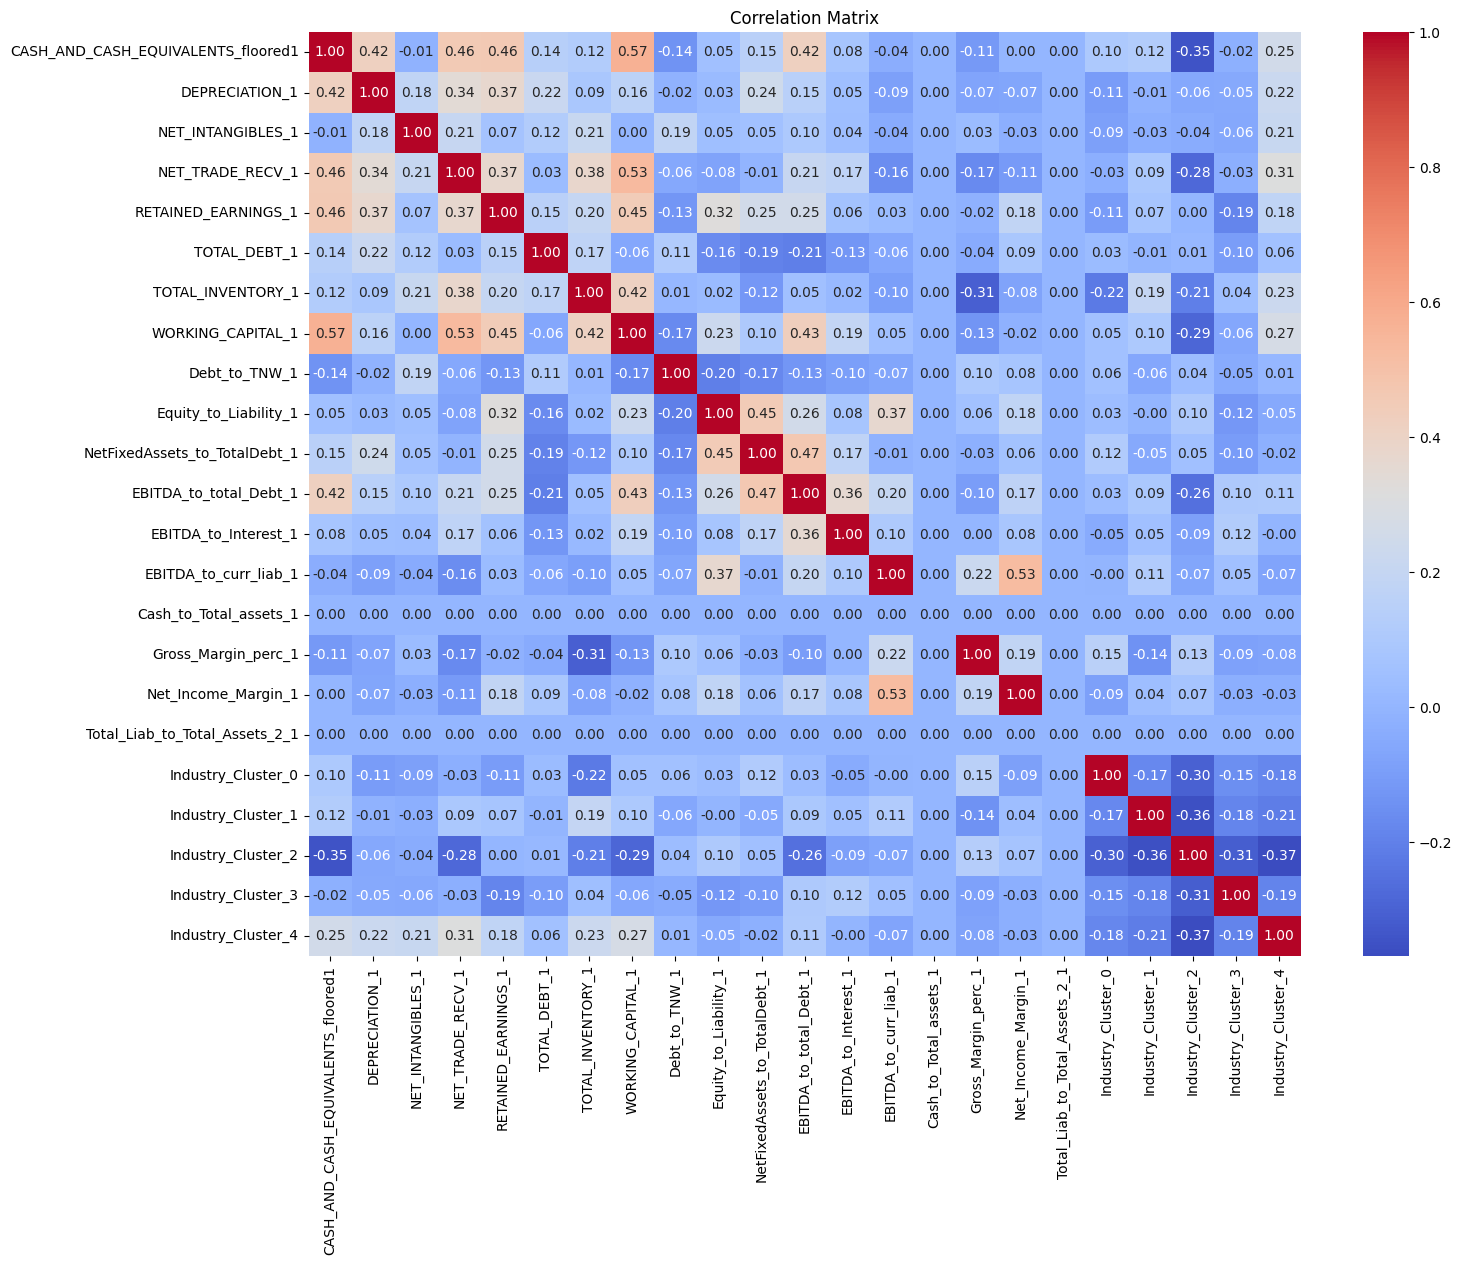

In [32]:
# Compute correlation matrix for numeric features (excluding target)
corr_matrix = data_after_dummy.drop(columns=['Default']).corr()
corr_matrix = corr_matrix.fillna(0)

# Visualize the correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

# This is just to make sure that there are no two variables which are highy correlated with each other
# more like varification of VIF results

In [33]:
# Assuming 'df' is your DataFrame and 'target_variable' is the name of your target column
percentage_ones = (data_after_dummy["Default"].sum() / len(data_after_dummy)) * 100

print(f"Percentage of 1's in the target variable: {percentage_ones:.2f}%")


# We have imbalanced classification problem here

Percentage of 1's in the target variable: 11.03%


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

def calculate_accuracy_by_variable(df, target_variable):
    """
    Calculate the accuracy of logistic regression for each variable one by one.

    Parameters:
    - df: DataFrame containing the dataset.
    - target_variable: The target column name.

    Returns:
    - A DataFrame with accuracy and coefficients for each variable.
    """
    accuracy_results = []

    # Separate features and target
    X = df.drop(columns=[target_variable])  # Features
    y = df[target_variable]  # Target

    # Loop through each feature
    for feature in X.columns:
        # Use only the current feature for training
        X_single_feature = X[[feature]]

        # Split data into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(X_single_feature, y, test_size=0.3, random_state=100)

        # Initialize the logistic regression model
        model = LogisticRegression(class_weight="balanced")  # Set a higher max_iter if convergence issues occur

        # Fit the model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)

        # Get the coefficient for the feature
        coefficient = model.coef_[0][0]  # Coefficient for the current feature

        # Store the result
        accuracy_results.append({'Feature': feature, 'Accuracy': accuracy, 'Coefficient': round(coefficient, 5)})

    # Convert the result to a DataFrame for better readability
    accuracy_df = pd.DataFrame(accuracy_results)

    # Sort the DataFrame by Accuracy in descending order
    accuracy_df = accuracy_df.sort_values(by='Accuracy', ascending=False)

    return accuracy_df

# Example Usage
# Assuming 'df_credit_rsk_clipped' is your DataFrame and 'Default' is your target variable
target_variable = "Default"
accuracy_df = calculate_accuracy_by_variable(data_after_dummy, target_variable)

# Display the results
print(accuracy_df)


                               Feature  Accuracy  Coefficient
14              Cash_to_Total_assets_1      0.88         0.00
17      Total_Liab_to_Total_Assets_2_1      0.88         0.00
2                    NET_INTANGIBLES_1      0.80         0.00
0   CASH_AND_CASH_EQUIVALENTS_floored1      0.78        -0.00
9                Equity_to_Liability_1      0.76         0.13
13               EBITDA_to_curr_liab_1      0.75         0.22
20                  Industry_Cluster_2      0.65         1.51
1                       DEPRECIATION_1      0.65         0.00
15                 Gross_Margin_perc_1      0.65         0.01
16                 Net_Income_Margin_1      0.60         0.00
7                    WORKING_CAPITAL_1      0.45        -0.00
6                    TOTAL_INVENTORY_1      0.44        -0.00
10       NetFixedAssets_to_TotalDebt_1      0.44        -0.06
5                         TOTAL_DEBT_1      0.37        -0.00
11              EBITDA_to_total_Debt_1      0.34        -0.57
8       

In [35]:
# Calculating variable importance using random forest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def calculate_feature_importance(df, target_variable):
    """
    Calculate feature importance using Random Forest.

    Parameters:
    - df: DataFrame containing the dataset.
    - target_variable: The target column name.

    Returns:
    - A DataFrame with features and their importance scores.
    """
    # Separate features and target
    X = df.drop(columns=[target_variable])  # Features
    y = df[target_variable]  # Target

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

    # Initialize the Random Forest model
    model = RandomForestClassifier(n_estimators=100, random_state=100, class_weight="balanced")

    # Fit the model
    model.fit(X_train, y_train)

    # Predict and calculate accuracy
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    # Get the feature importances
    feature_importances = model.feature_importances_

    # Create a DataFrame to store the features and their importance
    importance_df = pd.DataFrame({
        "Feature": X.columns,
        "Importance": feature_importances
    })

    # Sort the features by importance in descending order
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    return importance_df

# Example Usage
# Assuming 'data_after_dummy' is your DataFrame and 'Default' is your target variable
target_variable = "Default"
importance_df = calculate_feature_importance(data_after_dummy, target_variable)

# Display the result
print(importance_df)


Accuracy: 0.9882
                               Feature  Importance
0   CASH_AND_CASH_EQUIVALENTS_floored1        0.10
4                  RETAINED_EARNINGS_1        0.10
15                 Gross_Margin_perc_1        0.10
1                       DEPRECIATION_1        0.09
7                    WORKING_CAPITAL_1        0.08
6                    TOTAL_INVENTORY_1        0.07
3                     NET_TRADE_RECV_1        0.07
5                         TOTAL_DEBT_1        0.06
12                EBITDA_to_Interest_1        0.06
16                 Net_Income_Margin_1        0.06
20                  Industry_Cluster_2        0.06
8                        Debt_to_TNW_1        0.03
11              EBITDA_to_total_Debt_1        0.03
10       NetFixedAssets_to_TotalDebt_1        0.02
9                Equity_to_Liability_1        0.02
2                    NET_INTANGIBLES_1        0.02
13               EBITDA_to_curr_liab_1        0.02
18                  Industry_Cluster_0        0.01
21            